In [44]:
from sklearn.datasets import load_digits
digits = load_digits()

In [46]:
mlflow.set_tracking_uri(uri="http://mlflow:5000")

In [27]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 195.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 219.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.4/568.4 kB 70.6 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.5.0
    Uninstalling importlib_metadata-8.5.0:
      Successfully uninstalled importlib_metadata-8.5.0


In [45]:
import mlflow

In [47]:
mlflow.autolog()

2024/10/18 01:13:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/10/18 01:13:05 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.11.1 <= statsmodels <= 0.14.3, but the installed version is 0.14.4. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2024/10/18 01:13:05 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [48]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


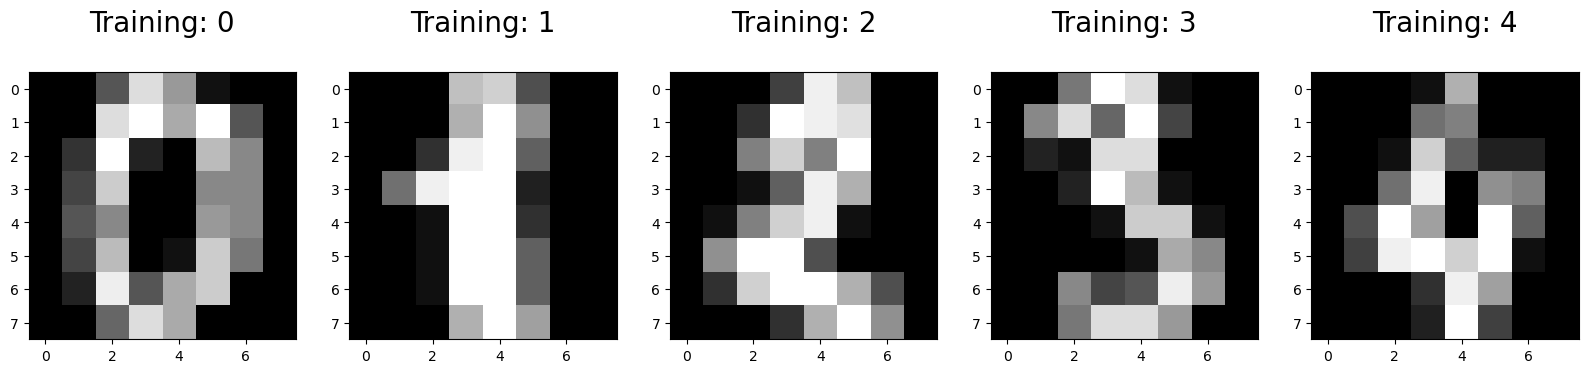

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(max_iter=1000)

In [53]:
logisticRegr.fit(x_train, y_train)

2024/10/18 01:13:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9141e86b34164504b18d3cbe2c7d8a1f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/10/18 01:14:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run luxuriant-vole-260 at: http://mlflow:5000/#/experiments/0/runs/9141e86b34164504b18d3cbe2c7d8a1f.
2024/10/18 01:14:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow:5000/#/experiments/0.
2024/10/18 01:14:24 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: API request to http://mlflow:5000/api/2.0/mlflow-artifacts/artifacts/0/9141e86b34164504b18d3cbe2c7d8a1f/artifacts/training_confusion_matrix.png failed with exception HTTPConnectionPool(host='mlflow', port=5000): Max retries exceeded with url: /api/2.0/mlflow-artifacts/artifacts/0/9141e86b34164504b18d3cbe2c7d8a1f/artifact

LogisticRegression(max_iter=1000)

In [54]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [55]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [56]:
predictions = logisticRegr.predict(x_test)

In [57]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [59]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


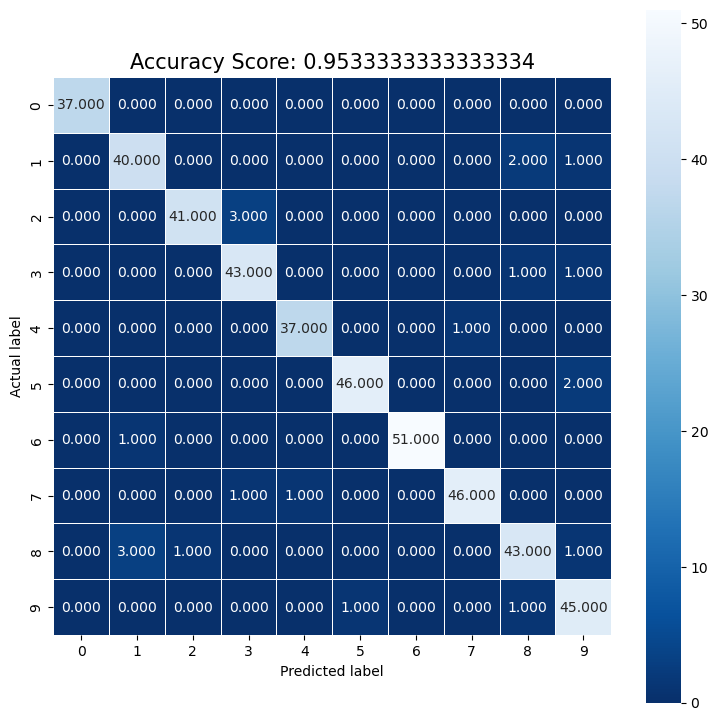

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);